In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/content/talking_data.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [3]:
data.shape

(100000, 8)

In [4]:
data.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [5]:
data.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [6]:
data['click_time']=pd.to_datetime(data['click_time'])

In [7]:
data['attributed_time']=pd.to_datetime(data["attributed_time"])

In [8]:
data['cdiff']=data.attributed_time-data.click_time

In [9]:
data.drop(['attributed_time','cdiff'],axis=1)

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [10]:
data.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
cdiff              99773
dtype: int64

In [11]:
cols = data.columns
for col in cols:
  print(col)
  print(len(data[col].unique()),'\n')

ip
34857 

app
161 

device
100 

os
130 

channel
161 

click_time
80350 

attributed_time
228 

is_attributed
2 

cdiff
185 



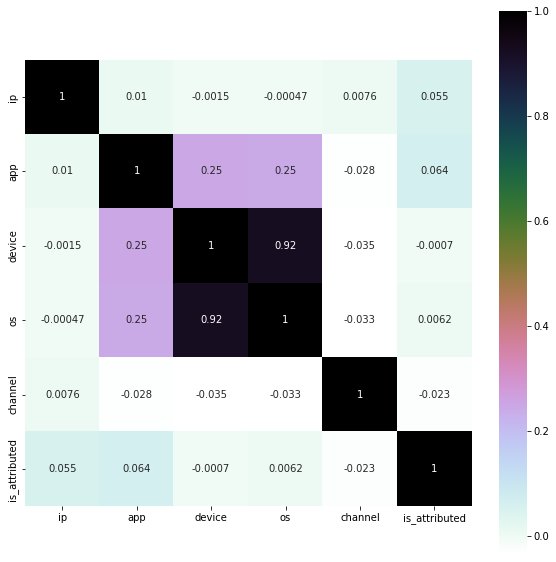

In [12]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

(array([9.8107e+04, 1.5280e+03, 2.5200e+02, 6.9000e+01, 1.9000e+01,
        9.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([  1.,  56., 111., 166., 221., 276., 331., 386., 441., 496., 551.]),
 <a list of 10 Patch objects>)

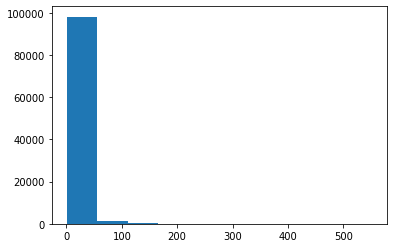

In [13]:
plt.hist(data['app'])

In [14]:
data.app.value_counts(normalize=True)

3      0.18279
12     0.13198
2      0.11737
9      0.08992
15     0.08595
        ...   
145    0.00001
97     0.00001
96     0.00001
267    0.00001
261    0.00001
Name: app, Length: 161, dtype: float64

In [15]:
frequent_apps = data.groupby('app').is_attributed.count()

In [16]:
frequent_apps = data.groupby('app').size().reset_index(name='count')
frequent_apps = frequent_apps[frequent_apps['count']>frequent_apps['count'].quantile(0.80)]
frequent_apps = frequent_apps.merge(data, on='app', how='inner')
frequent_apps.tail()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed,cdiff
98972,151,109,26762,0,0,347,2017-11-07 11:03:36,NaT,0,NaT
98973,151,109,86767,0,24,347,2017-11-08 05:19:23,NaT,0,NaT
98974,151,109,81674,0,0,347,2017-11-08 04:31:22,NaT,0,NaT
98975,151,109,147113,0,38,347,2017-11-08 11:05:23,NaT,0,NaT
98976,151,109,147065,0,0,347,2017-11-07 04:42:09,NaT,0,NaT


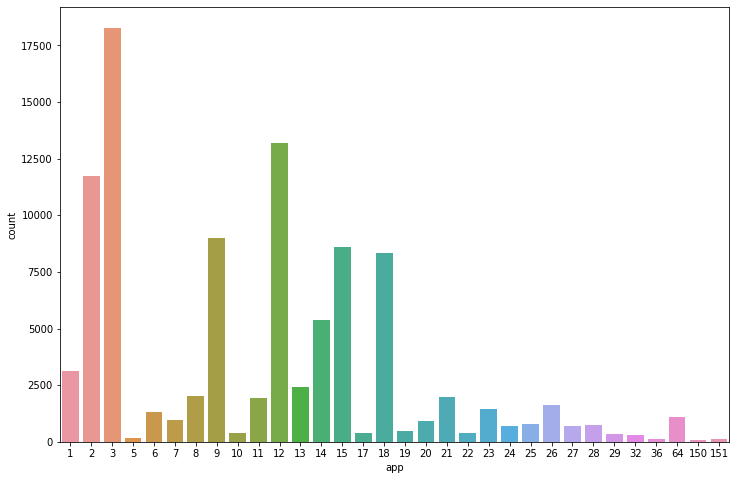

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='app',data=frequent_apps)
plt.show()

In [18]:
data.dtypes

ip                           int64
app                          int64
device                       int64
os                           int64
channel                      int64
click_time          datetime64[ns]
attributed_time     datetime64[ns]
is_attributed                int64
cdiff              timedelta64[ns]
dtype: object

In [21]:
data['day_of_week'] = data['click_time'].dt.dayofweek
data["day_of_year"] = data["click_time"].dt.dayofyear
data["month"] = data["click_time"].dt.month
data["hour"] = data["click_time"].dt.hour
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,cdiff,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,NaT,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,NaT,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,NaT,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,NaT,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,NaT,3,313,11,9


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_ = data.drop(['is_attributed','attributed_time','cdiff','click_time'], axis=1)
y_ = data['is_attributed']

sm = SMOTE()
X, y = sm.fit_resample(X_, y_)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# sm = SMOTE()
# X_train, y_train = sm.fit_resample(X_train_imb, y_train_imb)

# sm=SMOTE(random_state=42)
# X_sm, y_sm = sm.fit_resample(X, y)

# print(X_train_imb.shape)
# print(y_train_imb.shape)
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())
print(X_train.dtypes)
print(y_train.dtype)
# X_train = X_train.drop(['cdiff'],axis=1)
# X_train = X_train.drop(['click_time'],axis=1)
# X_train = X_train.drop(['attributed_time'],axis=1)
# X_test = X_test.drop(['cdiff'],axis=1)
# X_test = X_test.drop(['click_time'],axis=1)
# X_test = X_test.drop(['attributed_time'],axis=1)

(159636, 9)
(159636,)
0    79936
1    79700
Name: is_attributed, dtype: int64
ip             int64
app            int64
device         int64
os             int64
channel        int64
day_of_week    int64
day_of_year    int64
month          int64
hour           int64
dtype: object
int64


In [27]:
print(y_train.mean())
print(y_test.mean())

0.49926081836177305
0.5029566524680531


In [28]:
import xgboost as xg
from xgboost import XGBClassifier
from sklearn import metrics

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier()

In [29]:
y_pred = model.predict_proba(X_test)
y_pred[:10]
pred_y = model.predict(X_test)

In [30]:
print(y_pred)

[[0.02446884 0.97553116]
 [0.90654993 0.09345008]
 [0.43310845 0.56689155]
 ...
 [0.9516678  0.04833223]
 [0.9516221  0.04837785]
 [0.9842409  0.01575911]]


In [31]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: {}%".format(roc * 100.0))

AUC: 99.15398639699683%


In [32]:
f_imp = pd.Series(model.feature_importances_)
f_imp = pd.DataFrame(f_imp)
f_imp['features'] = cols


In [33]:
f_imp.columns = ['importance','features']
print(f_imp.sort_values(by='importance',ascending=False))
print('Top 5 features by importance are app, device, ip, channel and click time')

   importance         features
1    0.397570              app
2    0.254420           device
0    0.116711               ip
5    0.088338       click_time
4    0.075235          channel
8    0.034662            cdiff
3    0.033064               os
6    0.000000  attributed_time
7    0.000000    is_attributed
Top 5 features by importance are app, device, ip, channel and click time


In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
bgcl = BaggingClassifier(base_estimator=lr,n_estimators=10)

bgcl.fit(X_train, y_train)
bg_pred = bgcl.predict_proba(X_test)
pred_bg = bgcl.predict(X_test)

print(bg_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[[1.17922688e-04 9.99882077e-01]
 [4.94729111e-01 5.05270889e-01]
 [2.73018268e-01 7.26981732e-01]
 ...
 [4.12861083e-01 5.87138917e-01]
 [8.69438919e-01 1.30561081e-01]
 [6.64436834e-02 9.33556317e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
bg_roc = metrics.roc_auc_score(y_test, bg_pred[:, 1])
print("AUC: {}%".format(round((bg_roc * 100.0),2)))

AUC: 87.94%


In [36]:
print('AUC for XGBoost Classifier is {}%'.format(round((roc*100),2)))
print('and AUC for Bagging Classifier with \nLogistic Regression as base estimator is {}%'.format(round((bg_roc * 100.0),2)))
# AUC signifies area under curve of  ratio of True positives and false negatives
print('Would choose XGBoost Classifier as it has higher AUC')

AUC for XGBoost Classifier is 99.15%
and AUC for Bagging Classifier with 
Logistic Regression as base estimator is 87.94%
Would choose XGBoost Classifier as it has higher AUC


In [37]:
bgcl_score=bgcl.score(X_test, y_test)
xg_score = model.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}%".format(round((bgcl_score*100),2)))
print('The XGBoost Classifier model accuracy is {}%'.format(xg_score*100))

The Bagging classifier model accuracy is 80.87%
The XGBoost Classifier model accuracy is 95.62265096467051%


In [38]:
from sklearn.metrics import accuracy_score

xg_acc = accuracy_score(y_test, pred_y)
bgcl_acc = accuracy_score(y_test, pred_bg)
print('Accuracy score for XGBoost Classifier is {}'.format(xg_acc))
print('Accuracy score for Bagging Classifier is {}'.format(bgcl_acc))

Accuracy score for XGBoost Classifier is 0.9562265096467051
Accuracy score for Bagging Classifier is 0.8086695063893761


In [39]:
print('XGBoost Classifier\n\n',metrics.confusion_matrix(y_test, pred_y))
print('\n',metrics.classification_report(y_test, pred_y, labels=[0, 1]))

print('Bagging Classifier\n')
print(metrics.confusion_matrix(y_test, pred_bg))
print('\n',metrics.classification_report(y_test, pred_bg))

XGBoost Classifier

 [[19123   714]
 [ 1033 19040]]

               precision    recall  f1-score   support

           0       0.95      0.96      0.96     19837
           1       0.96      0.95      0.96     20073

    accuracy                           0.96     39910
   macro avg       0.96      0.96      0.96     39910
weighted avg       0.96      0.96      0.96     39910

Bagging Classifier

[[16518  3319]
 [ 4317 15756]]

               precision    recall  f1-score   support

           0       0.79      0.83      0.81     19837
           1       0.83      0.78      0.80     20073

    accuracy                           0.81     39910
   macro avg       0.81      0.81      0.81     39910
weighted avg       0.81      0.81      0.81     39910

